<a href="https://colab.research.google.com/github/pasdptt/PasdPublicNB/blob/master/Imbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is imbalanced data?

Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class.

This bias in the training dataset can influence many machine learning algorithms, leading some to ignore the minority class entirely. This is a problem as it is typically the minority class on which predictions are most important.

##Example of imbalanced data

Let’s assume that XYZ is a bank that issues a credit card to its customers. Now the bank is concerned that some fraudulent transactions are going on and when the bank checks their data they found that for each 2000 transaction there are only 30 Nos of fraud recorded. So, the number of fraud per 100 transactions is less than 2%, or we can say more than 98% transaction is “No Fraud” in nature. Here, the class “No Fraud” is called the majority class, and the much smaller in size “Fraud” class is called the minority class.

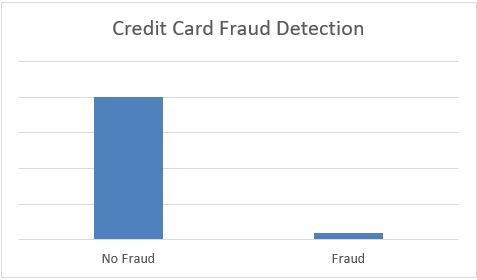

More such example of imbalanced data is –

* Disease diagnosis
* Customer churn prediction
* Fraud detection
* Natural disaster

Class imbalanced is generally normal in classification problems. But, in some cases, this imbalance is quite acute where the majority class’s presence is much higher than the minority class.

##Problems with imbalanced data classification
If we explain it in a very simple manner, the main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class? Let’s explain it with an example of disease diagnosis. Let’s assume we are going to predict disease from an existing dataset where for every 100 records only 5 patients are diagnosed with the disease. So, the majority class is 95% with no disease and the minority class is only 5% with the disease. Now, assume our model predicts that all 100 out of 100 patients have no disease.

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction. In this case, the confusion matrix for the classification problem shows how well our model classifies the target classes and we arrive at the accuracy of the model from the confusion matrix. It is calculated based on the total no of correct predictions by the model divided by the total no of predictions. In the above case it is (0+95)/(0+95+0+5)=0.95 or 95%. It means that the model fails to identify the minority class yet the accuracy score of the model will be 95%.

Size=100, Ratio=Counter({0: 99, 1: 1})
Size=1000, Ratio=Counter({0: 990, 1: 10})
Size=10000, Ratio=Counter({0: 9900, 1: 100})
Size=100000, Ratio=Counter({0: 99000, 1: 1000})


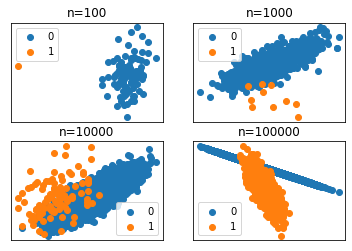

In [ ]:

# vary the dataset size for a 1:100 imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# dataset sizes
sizes = [100, 1000, 10000, 100000]
# create and plot a dataset with each size
for i in range(len(sizes)):
	# determine the dataset size
	n = sizes[i]
	# create the dataset
	X, y = make_classification(n_samples=n, n_features=2, n_redundant=0,
		n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
	# summarize class distribution
	counter = Counter(y)
	print('Size=%d, Ratio=%s' % (n, counter))
	# define subplot
	pyplot.subplot(2, 2, 1+i)
	pyplot.title('n=%d' % n)
	pyplot.xticks([])
	pyplot.yticks([])
	# scatter plot of examples by class label
	for label, _ in counter.items():
		row_ix = where(y == label)[0]
		pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
	pyplot.legend()
# show the figure
pyplot.show()

#Random Resampling Imbalanced Datasets

The simplest strategy is to choose examples for the transformed dataset randomly, called random resampling.

There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

* Random Oversampling: Randomly duplicate examples in the minority class.
* Random Undersampling: Randomly delete examples in the majority class.

Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.

In the random under-sampling, the majority class instances are discarded at random until a more balanced distribution is reached.

Both approaches can be repeated until the desired class distribution is achieved in the training dataset, such as an equal split across the classes.

They are referred to as “naive resampling” methods because they assume nothing about the data and no heuristics are used. This makes them simple to implement and fast to execute, which is desirable for very large and complex datasets.

Both techniques can be used for two-class (binary) classification problems and multi-class classification problems with one or more majority or minority classes.

Importantly, the change to the class distribution is only applied to the training dataset. The intent is to influence the fit of the models. The resampling is not applied to the test or holdout dataset used to evaluate the performance of a model.

Generally, these naive methods can be effective, although that depends on the specifics of the dataset and models involved.

In [1]:
!pip install imbalanced-learn

In [2]:
#check version number
import imblearn
print(imblearn.__version__)

0.8.1


##Random Oversampling Imbalanced Datasets
Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.

This technique can be effective for those machine learning algorithms that are affected by a skewed distribution and where multiple duplicate examples for a given class can influence the fit of the model. This might include algorithms that iteratively learn coefficients, like artificial neural networks that use stochastic gradient descent. It can also affect models that seek good splits of the data, such as support vector machines and decision trees.

It might be useful to tune the target class distribution. In some cases, seeking a balanced distribution for a severely imbalanced dataset can cause affected algorithms to overfit the minority class, leading to increased generalization error. The effect can be better performance on the training dataset, but worse performance on the holdout or test dataset.

As such, to gain insight into the impact of the method, it is a good idea to monitor the performance on both train and test datasets after oversampling and compare the results to the same algorithm on the original dataset.

The increase in the number of examples for the minority class, especially if the class skew was severe, can also result in a marked increase in the computational cost when fitting the model, especially considering the model is seeing the same examples in the training dataset again and again.

In [3]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


In [13]:
# example of evaluating a decision tree with random oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.9], flip_y=0)

In [14]:
# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.846


In [16]:
scores

array([0.86748709, 0.84095938, 0.83333333, 0.84509817, 0.87444161,
       0.85909539, 0.84581328, 0.83623739, 0.85099875, 0.80555556,
       0.82509011, 0.86783995, 0.8329481 , 0.83826355, 0.85425846,
       0.8711591 , 0.85293452, 0.82141118, 0.86646779, 0.84229436,
       0.87670286, 0.82979863, 0.85641528, 0.86166534, 0.85596423,
       0.81362061, 0.8437389 , 0.81417628, 0.86204605, 0.84016623])

##Random Undersampling Imbalanced Datasets

Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.

This has the effect of reducing the number of examples in the majority class in the transformed version of the training dataset. This process can be repeated until the desired class distribution is achieved, such as an equal number of examples for each class.

This approach may be more suitable for those datasets where there is a class imbalance although a sufficient number of examples in the minority class, such a useful model can be fit.

A limitation of undersampling is that examples from the majority class are deleted that may be useful, important, or perhaps critical to fitting a robust decision boundary. Given that examples are deleted randomly, there is no way to detect or preserve “good” or more information-rich examples from the majority class.

In [17]:
from imblearn.under_sampling import RandomUnderSampler

steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.901


In [18]:
scores

array([0.91 , 0.889, 0.913, 0.895, 0.905, 0.89 , 0.905, 0.884, 0.93 ,
       0.901, 0.909, 0.914, 0.891, 0.916, 0.894, 0.904, 0.883, 0.888,
       0.915, 0.892, 0.905, 0.901, 0.894, 0.906, 0.909, 0.877, 0.903,
       0.907, 0.903, 0.899])

##Combining Random Oversampling and Undersampling

Interesting results may be achieved by combining both random oversampling and undersampling.

For example, a modest amount of oversampling can be applied to the minority class to improve the bias towards these examples, whilst also applying a modest amount of undersampling to the majority class to reduce the bias on that class.

This can result in improved overall performance compared to performing one or the other techniques in isolation.

For example, if we had a dataset with a 1:100 class distribution, we might first apply oversampling to increase the ratio to 1:10 by duplicating examples from the minority class, then apply undersampling to further improve the ratio to 1:2 by deleting examples from the majority class.

This could be implemented using imbalanced-learn by using a RandomOverSampler with sampling_strategy set to 0.1 (10%), then using a RandomUnderSampler with a sampling_strategy set to 0.5 (50%). For example:

In [9]:
# example of combining random oversampling and undersampling for imbalanced data
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.1)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 990})
Counter({0: 1980, 1: 990})


In [20]:

# example of evaluating a model with random oversampling and undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define dataset
#X, y = make_classification(n_samples=10000, weights=[0.9], flip_y=0)
# define pipeline
over = RandomOverSampler(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.25)
steps = [('o', over), ('u', under), ('m', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.943


In [21]:
print(scores)

[0.956 0.933 0.943 0.933 0.947 0.942 0.953 0.936 0.951 0.932 0.943 0.943
 0.94  0.936 0.938 0.952 0.925 0.95  0.946 0.945 0.947 0.935 0.943 0.949
 0.946 0.929 0.954 0.934 0.946 0.95 ]


##Further reading for random sampling

https://arxiv.org/abs/1505.01658

#SMOTE: Synthetic Minority Oversampling Technique

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

Counter({0: 9900, 1: 100})


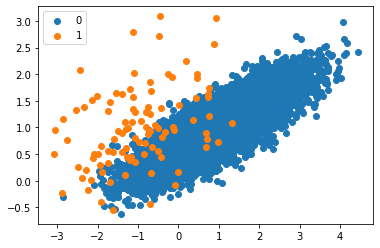

In [22]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 9900, 1: 9900})


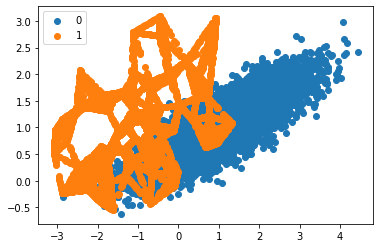

In [23]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class.

The imbalanced-learn library supports random undersampling via the RandomUnderSampler class.

We can update the example to first oversample the minority class to have 10 percent the number of examples of the majority class (e.g. about 1,000), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 2,000).

To implement this, we can specify the desired ratios as arguments to the SMOTE and RandomUnderSampler classes; for example:

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


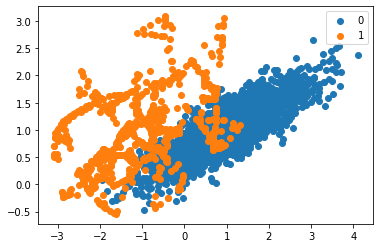

In [24]:

# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##Trying SMOTE with classification

Without SMOTE

In [25]:
# decision tree evaluated on imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.771


With pure SMOTE

In [26]:

# decision tree evaluated on imbalanced dataset with SMOTE oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# define dataset
#X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.816


Combine SMOTE with under sampling

In [27]:

# decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
#X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.845


Another area to explore would be to test different values of the k-nearest neighbors selected in the SMOTE procedure when each new synthetic example is created. The default is k=5, although larger or smaller values will influence the types of examples created, and in turn, may impact the performance of the model.

For example, we could grid search a range of values of k, such as values from 1 to 7, and evaluate the pipeline for each value.

In [28]:

# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
#X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.828
> k=2, Mean ROC AUC: 0.834
> k=3, Mean ROC AUC: 0.836
> k=4, Mean ROC AUC: 0.837
> k=5, Mean ROC AUC: 0.838
> k=6, Mean ROC AUC: 0.836
> k=7, Mean ROC AUC: 0.862


Reference:
SMOTE: Synthetic Minority Over-sampling Technique, 2002.
Borderline-SMOTE: A New Over-Sampling Method in Imbalanced Data Sets Learning, 2005.
Borderline Over-sampling For Imbalanced Data Classification, 2009.
ADASYN: Adaptive Synthetic Sampling Approach For Imbalanced Learning, 2008.